## layers 파이썬 만들었으니 불러와서 돌려보기

In [1]:
import numpy as np
from layers import OneLayer, TwoLayerNet
from numerical_gradient import numerical_gradient
from loss import cross_entropy_error
from activation import relu,softmax

In [2]:
def make_one(x):
    if x.ndim == 2:
        x = np.ravel(x.values)
    t = np.zeros((x.size,np.unique(x).size))
    for i in range(t.shape[0]):
        t[i,x[i]] = 1
    return t

In [3]:
from sklearn.datasets import load_wine
X = load_wine()['data']
y = load_wine()['target']
t = np.zeros((y.size,np.unique(y).size))

In [4]:
input_size = X.shape[1]
hidden_size = 5
output_size = t.shape[1]
model = TwoLayerNet(input_size=input_size,hidden_size=hidden_size,output_size=output_size)

In [5]:
epochs = 10000
lr = 1e-3
model.train(epochs,lr,X,t)

In [6]:
model.accuracy(X,t)

0.0

# 3차원

In [7]:
class ThreeLayerNet:
    def __init__(self,input_size,hidden_size1,hidden_size2,output_size):
        self.W = {}
        self.W['W1'] = np.random.randn(input_size,hidden_size1)
        self.W['b1'] = np.random.randn(hidden_size1)
        self.W['W2'] = np.random.randn(hidden_size1,hidden_size2)
        self.W['b2'] = np.random.randn(hidden_size2)
        self.W['W3'] = np.random.randn(hidden_size2,output_size)
        self.W['b3'] = np.random.randn(output_size)
        self.loss_val = []
    
    def predict(self,x):
        W1 = self.W['W1']
        W2 = self.W['W2']
        W3 = self.W['W3']
        b1 = self.W['b1']
        b2 = self.W['b2']
        b3 = self.W['b3']
        
        a1 = np.dot(x,W1) + b1 
        z1 = relu(a1)
        a2 = np.dot(z1,W2) + b2
        z2 = relu(a2)
        a3 = np.dot(z2,W3) + b3
        out = softmax(a3)
        return out
    
    def loss(self,x,t):
        y = self.predict(x)
        loss = cross_entropy_error(y,t)
        return loss

    def numerical_gradient(self,x,t):
        f = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(f, self.W['W1'])
        grads['b1'] = numerical_gradient(f, self.W['b1'])
        grads['W2'] = numerical_gradient(f, self.W['W2'])
        grads['b2'] = numerical_gradient(f, self.W['b2'])
        grads['W3'] = numerical_gradient(f, self.W['W3'])
        grads['b3'] = numerical_gradient(f, self.W['b3'])
        
        return grads

    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        acc = sum(y == t)/x.shape[0]
        return acc
    
    def fit(self,epochs,lr,x,t):
        for epoch in range(epochs):
            grads = self.numerical_gradient(x,t)
            for key in grads.keys():
                self.W[key] -= lr*grads[key]
            self.loss_val.append(self.loss(x,t))

In [8]:
from sklearn.datasets import load_digits

In [9]:
X = load_digits()['data']
y = load_digits()['target']
t = make_one(y)

In [10]:
input_size = X.shape[1]
output_size = t.shape[1]
hidden_size1 = 10
hidden_size2 = 5

In [11]:
model = ThreeLayerNet(input_size,hidden_size1,hidden_size2,output_size)

In [12]:
model.fit(100,1e-3,X,t)

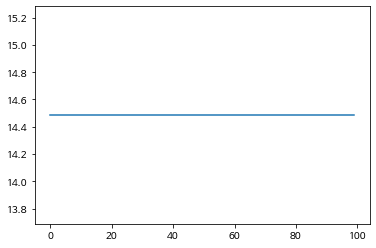

In [13]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(model.loss_val)),model.loss_val)

# 4 차원

In [14]:
# hidden layer가 여러겹 있을 때 돌아가는 구조
for i in [23,32,25]:
    print(i)

23
32
25


# 다차원

In [15]:
class MultiLayerNet:
    def __init__(self,input_size,hidden_size,output_size):
        hidden_size.append(output_size)
        self.W = {}
        self.W['Input'] = np.random.randn(input_size,hidden_size[0])
        self.W['Input_b'] = np.random.randn(hidden_size[0])
        for i in range(1,len(hidden_size)-1):
            w = 'W'+str(i)
            b = 'b'+str(i)
            self.W[w] = np.random.randn(hidden_size[i],hidden_size[i+1])
            self.W[b] = np.random.randn(hidden_size[i+1])
        return W

In [16]:
[1,2,3]
for i in range(1,3):
    print(i, i+1)

1 2
2 3


# 질문

In [27]:
#for문 안 확인
hidden_size = [1,2,3]
output_size = 3
hidden_size.append(output_size)
W = {}
for i in range(len(hidden_size)-1):
    w = 'W'+str(i)
    b = 'b'+str(i)
    W[w] = np.random.randn(hidden_size[i],hidden_size[i+1]) 
    W[b] = np.random.randn(hidden_size[i+1])
    print(w)
    print(b)
    print(W[w])

W0
b0
[[ 0.49301871 -0.25223591]]
W1
b1
[[ 0.16717282  0.78098533 -0.31294132]
 [-0.67587344 -0.75761285 -1.26010894]]
W2
b2
[[ 0.19003441 -0.13656249  1.27402587]
 [ 0.71175099  0.41762582 -1.45350186]
 [-1.96312573 -0.57209083  2.17063704]]


In [30]:
class MultiLayerNet:
    def __init__(self,input_size,hidden_size,output_size):
        hidden_size.append(output_size)
        self.W = {}
        self.W['Input'] = np.random.randn(input_size,hidden_size[0])
        self.W['Input_b'] = np.random.randn(hidden_size[0])
        for i in range(len(hidden_size)-1):
            w = 'W'+str(i)
            b = 'b'+str(i)
            self.W[w] = np.random.randn(hidden_size[i],hidden_size[i+1])
            self.W[b] = np.random.randn(hidden_size[i+1])
            
        self.keys = []
            
    def predict(self):
        for key in self.W.keys():
            self.keys.append(key)
        return self.keys

In [31]:
x = MultiLayerNet(3,[3,3,4,5,8],10)
x

In [32]:
x.predict()

['Input',
 'Input_b',
 'W0',
 'b0',
 'W1',
 'b1',
 'W2',
 'b2',
 'W3',
 'b3',
 'W4',
 'b4']

In [33]:
int(len(x.W.keys())/2)

6

In [34]:
#pridict 자동으로 하게 만들기
class MultiLayerNet:
    def __init__(self,input_size,hidden_size,output_size):
        hidden_size.append(output_size)
        self.W = {}
        self.W['Input'] = np.random.randn(input_size,hidden_size[0])
        self.W['Input_b'] = np.random.randn(hidden_size[0])
        for i in range(len(hidden_size)-1):
            w = 'W'+str(i)
            b = 'b'+str(i)
            self.W[w] = np.random.randn(hidden_size[i],hidden_size[i+1])
            self.W[b] = np.random.randn(hidden_size[i+1])
            
    def predict(self,x): 
        j = 0
        for i in range(len(self.W)):
            if j%2 ==0 and i >= (len(self.W)-2):
                x = relu(np.dot(x,self.W[list(self.W.keys())[i]])+self.W[list(self.W.keys())[i+1]])
            elif j%2 ==0 and i < (len(self.W)-2):
                x = (np.dot(x,self.W[list(self.W.keys())[i]])+self.W[list(self.W.keys())[i+1]])
            j += 1
        return softmax(x)
    
    def loss(self):
        pass
    
    def numerical_gradient(self):
        pass
    
    def accuracy(self):
        pass
    
    def fit(self):
        pass

In [35]:
x = np.random.randn(10,3)
x = np.dot(x,model.W['Input'])+model.W['Input_b']
x = np.dot(x,model.W['W1'])+model.W['b1']
x = np.dot(x,model.W['W2'])+model.W['b2']
x = np.dot(x,model.W['W3'])+model.W['b3']
x

KeyError: 'Input'

In [36]:
[1,2,3]
for i in range(10):
    print(i, i+1)

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10


In [37]:
j = 0
for i in range(10):
    if j % 2 == 0:
        print(i,i+1)
    j += 1

0 1
2 3
4 5
6 7
8 9


In [38]:
model = MultiLayerNet(3,[3,3,4,5,8],10)
model.predict(x).shape
np.sum(model.predict(x),axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [39]:
# predict for문 깔끔하게 고치기 # 혼자 해보래
def predict(self,x): 
    j = 0
    for i in range(len(self.W)):
        if j%2 ==0 and i >= (len(self.W)-2):
            x = relu(np.dot(x,self.W[list(self.W.keys())[i]])+self.W[list(self.W.keys())[i+1]])
        elif j%2 ==0 and i < (len(self.W)-2):
            x = (np.dot(x,self.W[list(self.W.keys())[i]])+self.W[list(self.W.keys())[i+1]])
        j += 1
    return softmax(x)

In [40]:
# 서버를 만들어 밖에서 접속가능하게 하는거(각 조별로) 할거래

In [41]:
def prob(x):
    return x/np.sum(x)

x = np.array([[3,4,7]])
prob(x)
softmax(x)

x = np.array([[.3,.4,.7]])
prob(x)
softmax(x)

#확률값이 prob이 좋은데 softmax쓰는 이유: 속도 문제로 수치가 아니라 해석적=식을 직접 써넣어주는것 >> prob에선 값이 안나옴 >> activ function 4개 (relu,sigmoid,softmax,weight)를 미분

array([[0.27800979, 0.30724834, 0.41474187]])

In [42]:
#나머지 채우기
class MultiLayerNet:
    def __init__(self,input_size,hidden_size,output_size):
        hidden_size.append(output_size)
        self.W = {}
        self.W['Input'] = np.random.randn(input_size,hidden_size[0])
        self.W['Input_b'] = np.random.randn(hidden_size[0])
        for i in range(1,len(hidden_size)-1):
            w = 'W'+str(i)
            b = 'b'+str(i)
            self.W[w] = np.random.randn(hidden_size[i],hidden_size[i+1])
            self.W[b] = np.random.randn(hidden_size[i+1])
            
    def predict(self,x): 
        j = 0
        for i in range(len(self.W)):
            if j%2 ==0 and i >= (len(self.W)-2):
                x = relu(np.dot(x,self.W[list(self.W.keys())[i]])+self.W[list(self.W.keys())[i+1]])
            elif j%2 ==0 and i < (len(self.W)-2):
                x = (np.dot(x,self.W[list(self.W.keys())[i]])+self.W[list(self.W.keys())[i+1]])
            j += 1
        return softmax(x)
    
    def loss(self,x,t):
        y = self.predict(x)
        return cross_entropy_error(y,t)
    
    def numerical_gradient(self,x,t):
        f = lambda W: self.loss(x,t) #10,10에대한 값이 나옴, w가 각각에 대해 가중치를 주는 계산을 함, 그 값을 원래값에서 빼주고 다시 반복. ???
        grads = {}
        for key in self.W.keys():
            grads[key] = numerical_gradient(f,self.W[key])
        return grads
    
    def accuracy(self,x,t):
        for i in range(len(self.W)):
            y = np.argmax(self.predict(x),axis=1)
            t = np.argmax(t,axis=1)
            acc = np.sum(y==t)/y.size
        return acc

    def fit(self,epochs,lr,x,verbos=1):
        for epoch in range(epochs):
            for key in self.W.keys():
                self.W[key] -= lr*self.numerical_gradient(x,t)[key]
            if verbos == 1:
                print(epoch,":epoch==========accuracy:",self.accuracy(x,t),"=========loss:",self.loss(x,t))
                

In [43]:
# numerical_gradient 확인

In [44]:
model = MultiLayerNet(3,[3,3,4,5,8],10)
y = np.random.randint(10,size = 100)
t = make_one(y)
t.shape
x = np.random.randn(100,3)

In [45]:
model.numerical_gradient(x,t)

{'Input': array([[ 0.02163377, -0.95929425, -0.59812524],
        [ 0.4583349 , -0.98136498, -0.78938548],
        [-0.27530737, -0.17071671,  0.03614558]]),
 'Input_b': array([ 2.51319409e-09, -3.11990122e-09, -3.88513248e-09]),
 'W1': array([[ 0.38606425,  1.50493246,  1.53385294,  0.66899161],
        [ 0.19381513,  0.60418555,  0.16622014,  0.44631735],
        [-0.05012152,  0.09137688,  0.50076088, -0.1065254 ]]),
 'b1': array([-1.15052858e-09, -3.11613779e-09, -4.32438864e-09, -5.97745810e-10]),
 'W2': array([[-0.22491169,  1.115494  , -1.32308021,  1.04583489, -1.53247536],
        [-0.19852352,  0.86404151, -1.05720838,  0.81578764, -1.20943449],
        [ 0.05901357, -0.71966449,  0.99447106, -0.69784832,  1.13029586],
        [ 0.28352627, -0.57157462,  0.46417333, -0.48702848,  0.55467988]]),
 'b2': array([ 7.75156689e-10, -1.23485217e-09,  1.09924258e-09, -1.07831679e-09,
         1.24914873e-09]),
 'W3': array([[-0.13477407, -0.08118259,  0.16771743, -0.77382721, -0.09561

In [50]:
x = np.random.randn(100,3)
model.fit(100,1e-3,x,2)